In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import random
from sklearn import metrics
import matplotlib.colors as colors
import math

In [ ]:
# Q1 : Linear Regression

In [ ]:
data = pd.read_csv('drive/MyDrive/part1/train45.csv', header=None)

In [ ]:
print(data.iloc[0])

0      1253.572076
1        30.142883
2    118462.238446
Name: 0, dtype: float64


In [ ]:
print(list(data.iloc[0][:-1]))
data.head()

[1253.5720757602824, 30.14288303041131]


,0,1,2
0,1253.572076,30.142883,118462.238446
1,1422.268150,36.890726,118249.126919
2,500.000000,0.000000,150000.000000
3,1547.380880,41.895235,118344.345711
4,691.765089,7.670604,134855.369834


In [ ]:
def train_test_split(data, split):
  x_train_data = []
  y_train_data = []
  x_test_data = []
  y_test_data = []
  n = len(data)
  train_size = int(n*split)
  test_size = n - train_size

  random_indices = random.sample(range(0, n), train_size)
  for i in range(0, len(random_indices)):
    x_train_data.append(list(data.iloc[random_indices[i]][:-1]))
    y_train_data.append(data.iloc[random_indices[i]][-1:].iloc[0])

  for i in range(0, n):
    if i not in random_indices:
      x_test_data.append(list(data.iloc[i][:-1]))
      y_test_data.append(data.iloc[i][-1:].iloc[0])

  return x_train_data,y_train_data,x_test_data,y_test_data

In [ ]:
x_train, y_train, x_validation, y_validation = train_test_split(data, 0.9)

In [ ]:
print(x_train)

[[2212.481919705321, 68.49927678821285], [1707.5443625551368, 48.30177450220548], [1253.5720757602824, 30.14288303041131], [1191.8397850208646, 27.673591400834603], [2403.2872463863705, 76.13148985545483], [1536.70983897715, 41.468393559086], [2295.1083170487727, 71.8043326819509], [1833.0638540613927, 53.32255416245573], [784.7896362666561, 11.39158545066624], [2149.8757907909767, 65.99503163163908], [1154.734962401589, 26.18939849606356], [1839.3326052691664, 53.57330421076665], [805.4203238972714, 12.21681295589086], [1548.017516364453, 41.92070065457813], [1526.0036139600556, 41.04014455840222], [1080.9132527855031, 23.23653011142013], [2428.840359129214, 77.15361436516858], [1602.1578098350603, 44.08631239340243], [1736.43824674888, 49.457529869955216], [1526.4897179207992, 41.059588716831975], [2483.985882812495, 79.35943531249981], [1547.3808803638117, 41.89523521455248], [1052.2744078734222, 22.090976314936885], [2175.0485341343883, 67.00194136537552], [1458.1280787605394, 38.3

In [ ]:
print(x_validation)
print(y_validation)

[[1279.0401675659857, 31.16160670263942], [1185.4522531580849, 27.41809012632337], [1273.2429105298393, 30.92971642119357], [1368.6275878992149, 34.7451035159686], [2089.4042243799013, 63.57616897519604], [2126.2193716825327, 65.04877486730132], [1537.096873315865, 41.48387493263461], [1474.8827986199772, 38.99531194479909]]
[118383.03284082624, 119015.95924294602, 122834.23681405108, 118348.5815594761, 113290.39318899006, 112256.0129751378, 118692.31775411172, 118342.42325148152]


In [ ]:
def linear_fit(x_train, y_train):
  l = []
  for i in range(0, len(x_train)):
    r = []
    r.append(1)
    for j in range(len(x_train[i])):
      r.append(x_train[i][j])

    l.append(r)
  
  x = np.array(l)
  # print(x.shape)
  y = np.transpose(np.array(y_train))
  # print(y.shape)
  theta= np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.matmul(np.transpose(x), y))

  return theta


In [ ]:
parameters = linear_fit(x_train, y_train)
print(parameters)

[ 8.02493143e+04  6.73567537e+01 -1.63161730e+03]


In [ ]:
def mean_squared_error(y_test, y_pred):
  value = 0 
  for i in range(0, len(y_test)):
    value+=(y_test[i]-y_pred[i]) * (y_test[i] - y_pred[i])

  return value/len(y_test)

In [ ]:
parameters = np.array(parameters)
y_predicted = []
for i in range(0, len(x_validation)):
  temp = x_validation[i].copy()
  temp.insert(0, 1)
  temp = np.array(temp)
  value = np.dot(temp, parameters)
  y_predicted.append(value)

print("Mean Squared Error is : ", mean_squared_error(y_validation, y_predicted))

Mean Squared Error is :  16883013.909705855


In [ ]:
# Making predictions for actual testing data set : 
test = pd.read_csv('drive/MyDrive/part1/test45.csv', header=None)

In [ ]:
test.head()

,0,1,2
0,1711.288972,48.451559,118502.672223
1,1754.621969,50.184879,118232.008198
2,2922.186368,96.887455,34927.051747
3,2129.961556,65.198462,112248.902819
4,1607.276970,44.291079,118488.052900


In [ ]:
def predict(x_test, y_test,  parameters):
  y_pred = []
  x_test = np.array(x_test)
  for i in range(0, len(x_test)):
    temp = []
    temp.append(1)
    for j in range(0, len(x_test[i])):
      temp.append(x_test[i][j])
    temp = np.array(temp)
    value = np.dot(temp, parameters)
    y_pred.append(value)

  return y_pred



In [ ]:
x_test = []
y_test = []
for i in range(0, len(test)):
  x_test.append(list(test.iloc[i][:-1]))
  y_test.append(test.iloc[i][-1:].iloc[0])

predicted_values = predict(x_test, y_test, parameters)

In [ ]:
# print(predicted_values)
print(mean_squared_error(y_test, predicted_values))

1246983744.8886085


In [ ]:
# Conclusion : Linear Model seems to work decent for testing data : 
# Let's try different degree polynomials to fit the curve : 

def fit_transform(data, degree):
  res = []
  for i in range(0, len(data)):
    temp = []
    deg = degree
    while(deg>=0):
      temp.append(pow(data[i][0], deg) * pow(data[i][1], degree-deg))
      deg-=1

    res.append(temp)

  return res


In [ ]:
degree = [1, 2, 3, 4, 5, 6, 7, 8]
errors_train = []
errors_validation = []
training_predictions = []
validation_predictions = []
params = []
for deg in degree:
  x_train_transformed = fit_transform(x_train, deg)
  x_validation_transformed = fit_transform(x_validation, deg)
  
  parameters = linear_fit(x_train_transformed, y_train)
  params.append(parameters)
  y_predicted = []
  for i in range(0, len(x_validation_transformed)):
    temp = x_validation_transformed[i].copy()
    temp.insert(0, 1)
    temp = np.array(temp)
    value = np.dot(temp, parameters)
    y_predicted.append(value)
  
  validation_predictions.append(y_predicted)
  errors_validation.append(mean_squared_error(y_validation, y_predicted))

  y_train_pred = []
  for i in range(0, len(x_train_transformed)):
    temp = x_train_transformed[i].copy()
    temp.insert(0, 1)
    temp = np.array(temp)
    value = np.dot(temp, parameters)
    y_train_pred.append(value)
    
  errors_train.append(mean_squared_error(y_train_pred, y_train))
  training_predictions.append(y_train_pred)

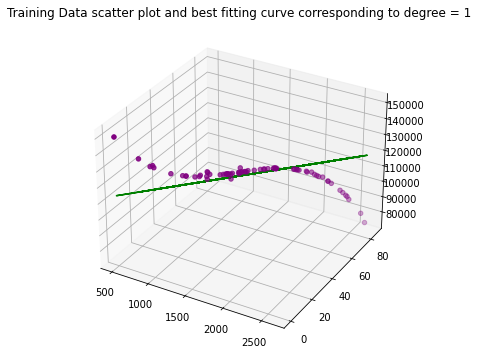

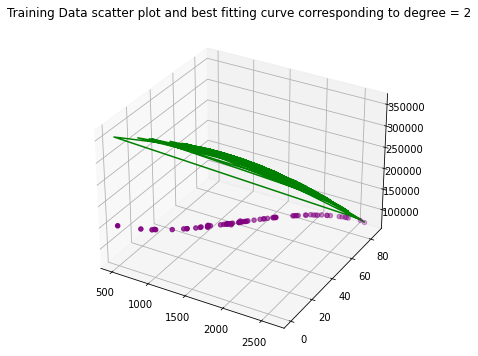

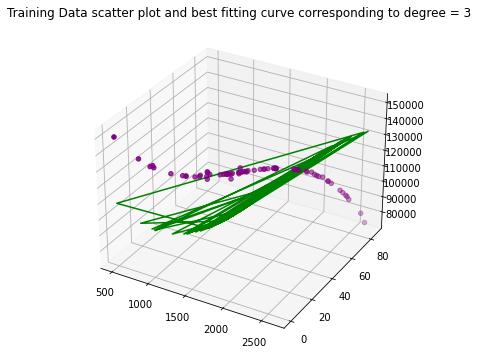

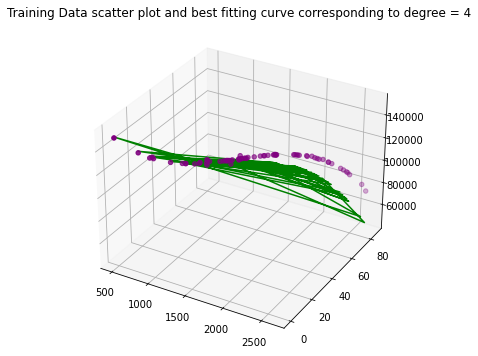

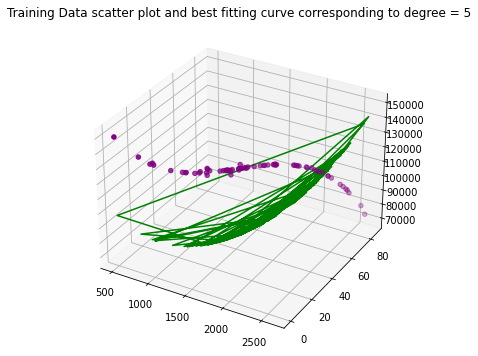

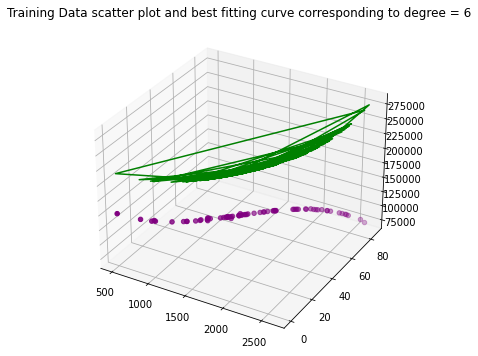

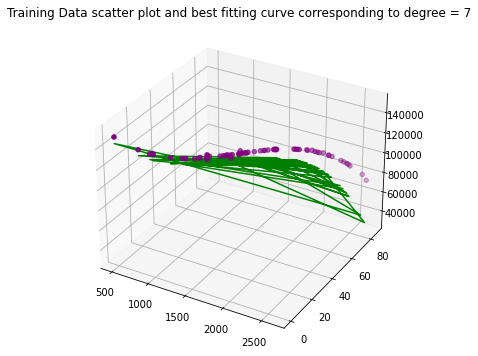

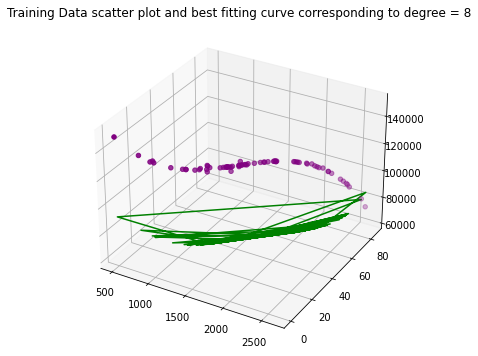

In [ ]:
# Graphs for Training Data based on parameters learned : 
x = []
y = []
for l in x_train:
  x.append(l[0])
  y.append(l[1])

z = y_train
for i in range(0, len(degree)):
  fig = plt.figure(figsize=(10,6))
  ax = plt.axes(projection ='3d')
  plt.title(f"Training Data scatter plot and best fitting curve corresponding to degree = {degree[i]}")
  ax.scatter(x, y, z, c='purple')
  ax.plot3D(x, y, training_predictions[i], 'green')
  plt.show()

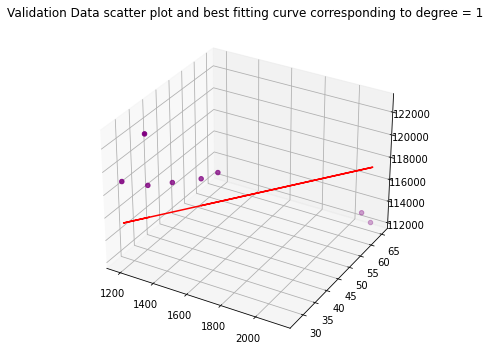

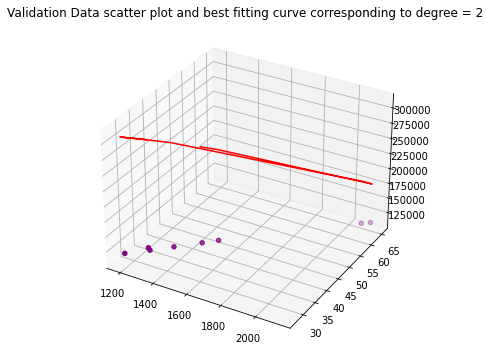

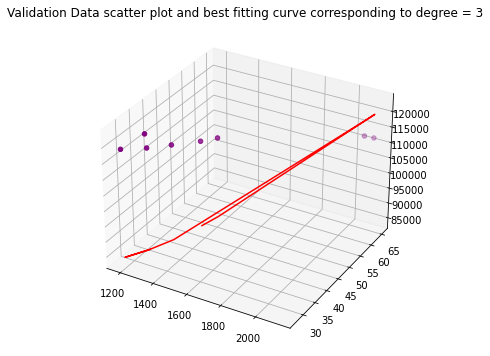

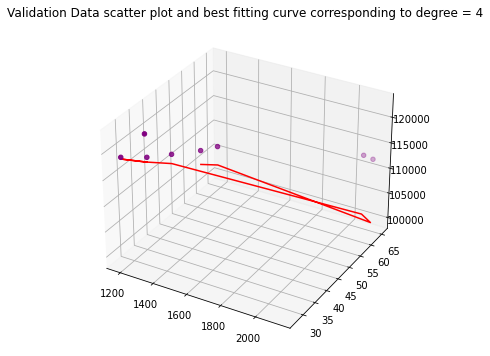

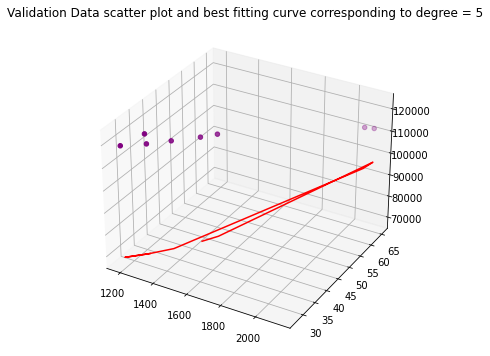

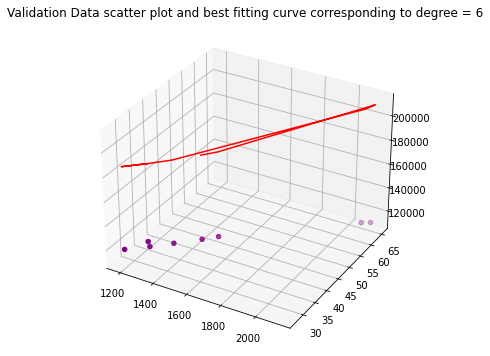

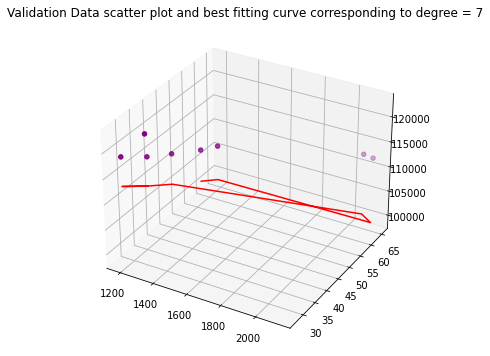

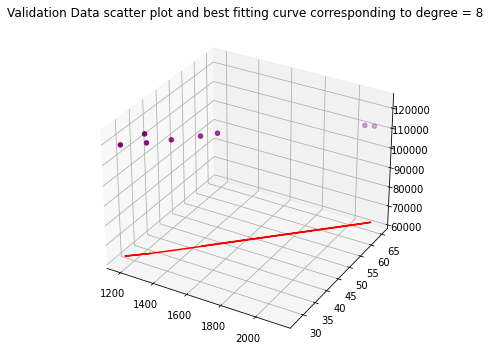

In [ ]:
# Graphs for Validation Data based on parameters learned : 
x = []
y = []
for l in x_validation:
  x.append(l[0])
  y.append(l[1])

z = y_validation
for i in range(0, len(degree)):
  fig = plt.figure(figsize=(10,6))
  ax = plt.axes(projection ='3d')
  plt.title(f"Validation Data scatter plot and best fitting curve corresponding to degree = {degree[i]}")
  ax.scatter(x, y, z, c='purple')
  ax.plot3D(x, y, validation_predictions[i], 'red')
  plt.show()

Text(0, 0.5, 'Error on Training Data')

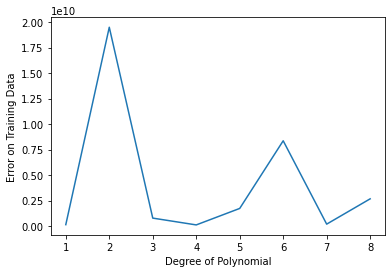

In [ ]:
plt.plot(degree, errors_train)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Error on Training Data")

Text(0, 0.5, 'Error on Validation Data')

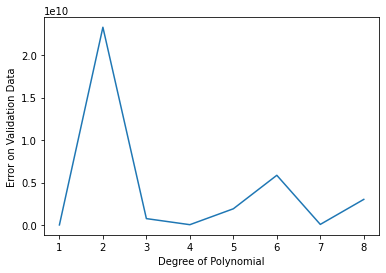

In [ ]:
plt.plot(degree, errors_validation)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Error on Validation Data")

In [ ]:
print(errors_train)
print(min(errors_train))

[136691951.8311255, 19501730361.447464, 780426313.7404553, 112159303.03163683, 1729239596.4584851, 8365134722.781263, 188833093.70820946, 2670756425.00564]
112159303.03163683


In [ ]:
# Above graph shows that degree 4 polynomial is the best. So making predictions for test data using degree 4 polynomial : 
x_transformed_testing = fit_transform(x_test, 4)
res = predict(x_transformed_testing, y_test, params[3])
err = mean_squared_error(y_test, res)
print("Error on Testing Data for degree 4 polynomial", err)
print("Error on Training Data for degree 4 polynomial", errors_train[3])


Error on Testing Data for degree 4 polynomial 514415262.9406489
Error on Training Data for degree 4 polynomial 112159303.03163683


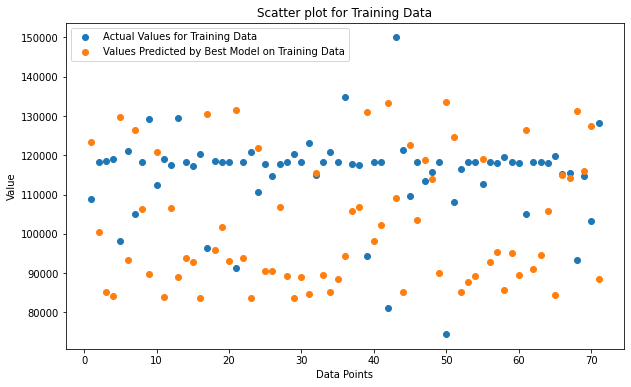

In [ ]:
# Scatter Plot for Training Data : 
x = []
for i in range(1, len(x_train)+1):
  x.append(i)

y_actual = y_train
y_model_output = training_predictions[2]

plt.figure(figsize=(10,6))
plt.title("Scatter plot for Training Data")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.scatter(x, y_actual)
plt.scatter(x, y_model_output)
plt.legend(["Actual Values for Training Data", "Values Predicted by Best Model on Training Data"])
plt.show()

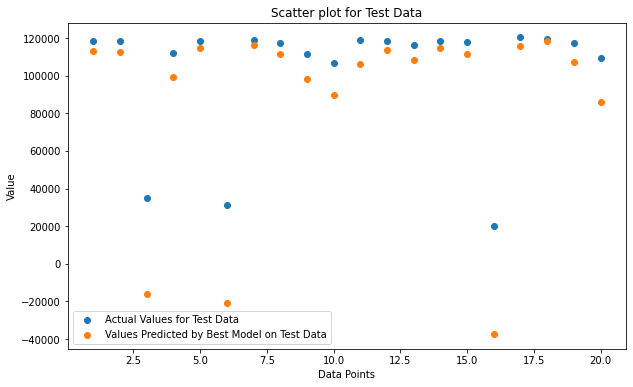

In [ ]:
# Scatter Plot for Testing Data : 
x = []
for i in range(1, len(x_test)+1):
  x.append(i)

y_actual_test_value = y_test
y_model_output_testing = res

plt.figure(figsize=(10,6))
plt.title("Scatter plot for Test Data")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.scatter(x, y_actual_test_value)
plt.scatter(x, y_model_output_testing)
plt.legend(["Actual Values for Test Data", "Values Predicted by Best Model on Test Data"])
plt.show()

**Observations for above part**
1. Best Model fitting the data set is a 4 degree polynomial.
2. For degree 6 polynomial Training error suddenly increases a lot.
3. From above scatter plot we can see most of the predicted values are closer to actual values but some are far away contributing most to the error.


In [ ]:
# Part b : Applying Ridge Regression : 
def linear_ridge_fit(x_train, y_train, lamda):
  l = []
  p = 0 
  for i in range(0, len(x_train)):
    r = []
    r.append(1)
    for j in range(len(x_train[i])):
      r.append(x_train[i][j])

    l.append(r)
    p = len(r)
  
  x = np.array(l)
  # print(x.shape)
  y = np.transpose(np.array(y_train))
  # print(y.shape)
  theta= np.matmul(np.linalg.inv(np.add(np.matmul(np.transpose(x), x), lamda*np.identity(p))), np.matmul(np.transpose(x), y))

  return theta



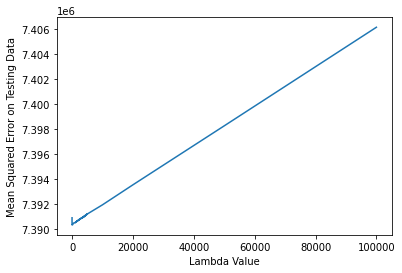

In [ ]:
lambda_values = [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 4000, 5000, 1000, 2000, 5000, 10000, 20000, 50000, 100000]

errors = []
training_regularized_predictions = []
testing_regularized_predictions = []
# x_validation_transformed = fit_transform(x_validation, 3)
for val in lambda_values:
  x_train_transformed = fit_transform(x_train, 4)
  parameters = linear_ridge_fit(x_train_transformed, y_train, val)
  res = predict(x_transformed_testing, y_test, parameters)
  testing_regularized_predictions.append(res)
  errors.append(mean_squared_error(res, y_test))

  y_train_pred = []
  for i in range(0, len(x_train_transformed)):
    temp = x_train_transformed[i].copy()
    temp.insert(0, 1)
    temp = np.array(temp)
    value = np.dot(temp, parameters)
    y_train_pred.append(value)

  training_regularized_predictions.append(y_train_pred)

plt.xlabel("Lambda Value")
plt.ylabel("Mean Squared Error on Testing Data")
plt.plot(lambda_values, errors)


In [ ]:
print(errors)

[7390907.952067064, 7390406.467871298, 7390384.003931841, 7390335.248822518, 7390342.13530533, 7390340.114866942, 7390349.687650999, 7390355.81820281, 7390486.356296562, 7390517.274100052, 7390616.184605615, 7390700.595984271, 7390805.525598792, 7390979.335775453, 7391207.728200066, 7390517.274100052, 7390700.595984271, 7391207.728200066, 7391945.857939328, 7393548.857977657, 7398275.470973966, 7406177.781683737]


In [ ]:
# Best Lambda = 10

print("Training error corresponding to best lambda chosen in ridge regression", mean_squared_error(training_regularized_predictions[3], y_train))
print("Test error corresponding to best lambda chosen in ridge regression", errors[3])

Training error corresponding to best lambda chosen in ridge regression 623435.9820944481
Test error corresponding to best lambda chosen in ridge regression 7390335.248822518


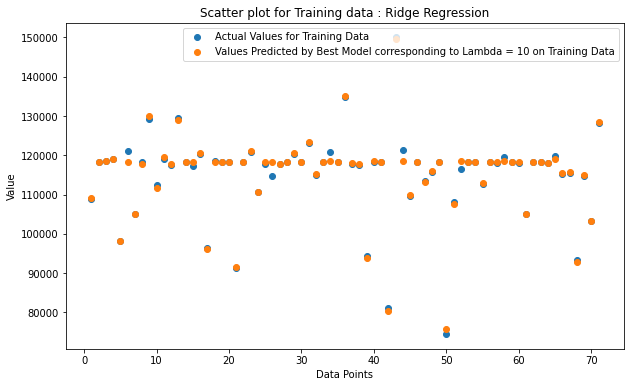

In [ ]:
x = []
for i in range(1, len(x_train)+1):
  x.append(i)

y_actual = y_train
y_model_output = training_regularized_predictions[3]

plt.figure(figsize=(10,6))
plt.title("Scatter plot for Training data : Ridge Regression")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.scatter(x, y_actual)
plt.scatter(x, y_model_output)
plt.legend(["Actual Values for Training Data", "Values Predicted by Best Model corresponding to Lambda = 10 on Training Data"])
plt.show()

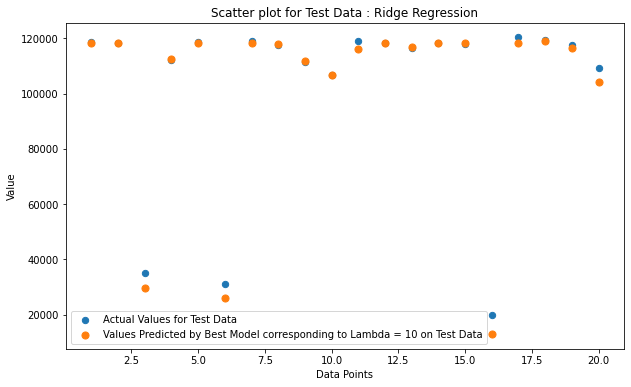

In [ ]:
# Scatter Plot for Regularized Predictions on Test Data : 
x = []
for i in range(1, len(x_test)+1):
  x.append(i)

y_actual_test_value = y_test
y_regularized_model_output_testing = testing_regularized_predictions[3]

plt.figure(figsize=(10,6))
plt.title("Scatter plot for Test Data : Ridge Regression")
plt.xlabel("Data Points")
plt.ylabel("Value")
plt.scatter(x, y_actual_test_value, s=40)
plt.scatter(x, y_regularized_model_output_testing, s=50)
plt.legend(["Actual Values for Test Data", "Values Predicted by Best Model corresponding to Lambda = 10 on Test Data"])
plt.show()

Observations for Regularization Part : 
1. Best Lambda Value which minimises the error on test data : 10
2. As we can see above graph all blue points are not visible since they are overlapped by our model predicted values which is a really great thing.
3. Extremely large lambda values causes increase in testing error since they lead to underfitting.